Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений


Задание 1. Первичный анализ данных c Pandas

In [1]:
conda install seaborn

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sunny\anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py38haa95532_1         2.9 MB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following packages will be UPDATED:

  conda                                        4.8.3-py38_0 --> 4.10.1-py38haa95532_1




conda-4.10.1         | 2.9 MB    |            |   0% 
conda-4.10.1         | 2.9 MB    |            |   1% 
conda-4.10.1         | 2.9 MB    | 8          |   9% 
conda-4.10.1         | 2.9 MB    | #7         |  18% 
conda-4.10.1         | 2.9 MB    | ##5        |  26% 
conda-4.10.1         | 2.9 MB    | ###5  

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Считаем данные по росту и весу (weights_heights.csv, приложенный в задании) в объект Pandas DataFrame:

In [11]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 1 to 25000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  25000 non-null  float64
 1   Weight  25000 non-null  float64
dtypes: float64(2)
memory usage: 585.9 KB


Построим гистограмму распределения роста подростков из выборки data. Используем метод plot для DataFrame data c аргументами y='Height'

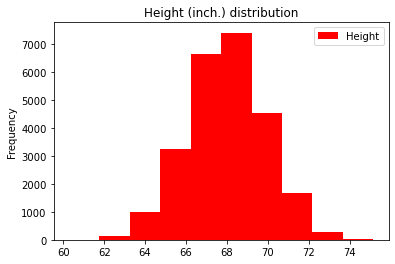

In [14]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

 Посмотрите на первые 5 записей с помощью метода head Pandas DataFrame. Нарисуйте гистограмму распределения веса с помощью метода plot Pandas DataFrame. Сделайте гистограмму зеленой, подпишите картинку

In [35]:
data.head(5)

,Height,Weight,BMI,weight_cat
Index,,,,
1,65.78331,112.9925,18.357573,1
2,71.51521,136.4873,18.762577,2
3,69.39874,153.0269,22.338895,3
4,68.21660,142.3354,21.504526,2
5,67.78781,144.2971,22.077581,2


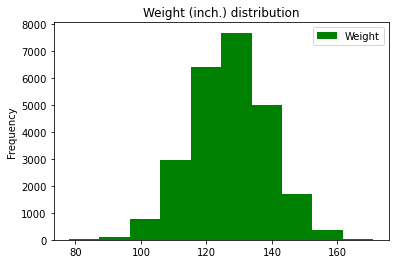

In [15]:
data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight (inch.) distribution')

Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается  𝑚×𝑚  графиков (m - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода  𝑠𝑐𝑎𝑡𝑡𝑒𝑟_𝑚𝑎𝑡𝑟𝑖𝑥  Pandas Data Frame или pairplot библиотеки Seaborn.

Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак Индекс массы тела (BMI). Для этого воспользуемся удобной связкой метода apply Pandas DataFrame и lambda-функций Python.

In [50]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
 (height_inch / METER_TO_INCH) ** 2

In [51]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

 Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод pairplot библиотеки Seaborn.

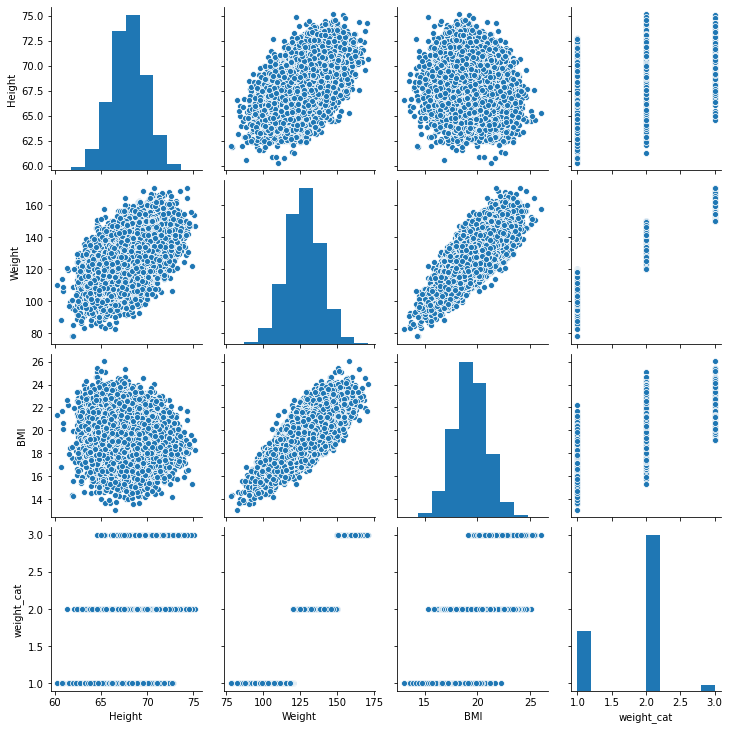

In [52]:
sns.pairplot(data)

. Создайте в DataFrame data новый признак weight_category, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод boxplot библиотеки Seaborn и метод apply Pandas DataFrame. Подпишите ось y меткой «Рост», ось x – меткой «Весовая категория».

In [53]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

In [1]:
def weight_category(weight):
    if weight<120:
        return 1
    elif weight>=150:
        return 3
    else:
        return 2

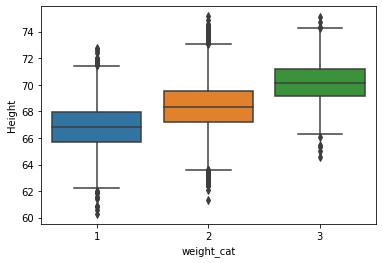

In [20]:
data['weight_cat'] = data['Weight'].apply(weight_category)

sns.boxplot(data=data, x='weight_cat', y= 'Height')

5 Постройте scatter plot зависимости роста от веса, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.

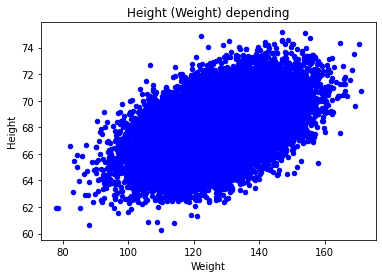

In [21]:
data.plot(y='Height',x='Weight', kind='scatter', 
           color='blue',  title='Height (Weight) depending')

Задание 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки.

[6]. Напишите функцию, которая по двум параметрам  𝑤0  и  𝑤1  вычисляет квадратичную ошибку приближения зависимости роста  𝑦  от веса  𝑥  прямой линией  𝑦=𝑤0+𝑤1∗𝑥 :
𝑒𝑟𝑟𝑜𝑟(𝑤0,𝑤1)=∑𝑖=1𝑛(𝑦𝑖−(𝑤0+𝑤1∗𝑥𝑖))2
 
Здесь  𝑛  – число наблюдений в наборе данных,  𝑦𝑖  и  𝑥𝑖  – рост и вес  𝑖 -ого человека в наборе данных.
Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

[7]. Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ( 𝑤0,𝑤1)=(60,0.05)  и ( 𝑤0,𝑤1)=(50,0.16) . Используйте метод plot из matplotlib.pyplot, а также метод linspace библиотеки NumPy. Подпишите оси и график.
Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

[8]. Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра  𝑤1  при  𝑤0  = 50. Подпишите оси и график.

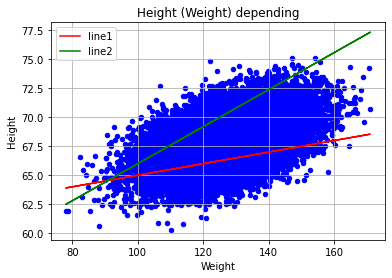

In [22]:
 def error(w0, w1):
    s=0
    x=data['Weight']
    y=data['Height']
    for i in range(1,len(data.index)):
        s+=(y[i]-w0-w1*x[i])**2
    return s

x=np.array(data['Weight'])
w0,w1=60,0.05
y1 = [w0+t*w1 for t in x]

w0,w1=50,0.16
y2 = [w0+t*w1 for t in x]

data.plot(y='Height',x='Weight', kind='scatter',
color='blue', title='Height (Weight) depending')

plt.plot(x, y1, color="red", label="line1")
plt.plot(x, y2, color="green", label="line2")
plt.grid(True)
plt.legend(loc='upper left')


Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

[8]. Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра  𝑤1  при  𝑤0  = 50. Подпишите оси и график.

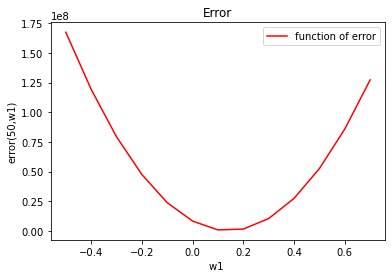

In [23]:
w0=50.
w = np.arange(-0.5, 0.8, 0.1)

err = [error(w0,w1) for w1 in w]
plt.title('Error')
plt.xlabel('w1 ')
plt.ylabel('error(50,w1)')

plt.plot(w, err, color="red", label="function of error")
plt.legend()

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте  𝑤0=50 .

[9]. С помощью метода minimize_scalar из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра  𝑤1  в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ( 𝑤0 ,  𝑤1 ) = (50,  𝑤1_𝑜𝑝𝑡 ), где  𝑤1_𝑜𝑝𝑡  – найденное в п. 8 оптимальное значение параметра  𝑤1 .

In [25]:
import scipy
from scipy.optimize import minimize_scalar

def error50(w1):
    return error(50,w1)

min=minimize_scalar(error50, bounds=(-5,5), method='bounded')
w1_opt=min.x
min.x, min.fun

(0.14109165115062905, 79510.63244004796)

При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме.

Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции  𝑧(𝑥,𝑦)=𝑠𝑖𝑛(𝑥2+𝑦2⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯√)  для значений  𝑥  и  𝑦  из интервала [-5,5] c шагом 0.25.

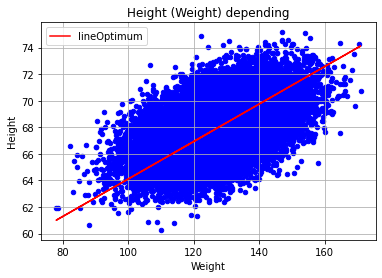

In [26]:
x=np.array(data['Weight'])

w0,w1=50,w1_opt
y = [w0+t*w1 for t in x]

#xx = np.linspace(np.min(data['Weight']),np.max(data['Weight']),data.count)
data.plot(y='Height',x='Weight', kind='scatter', 
 color='blue', title='Height (Weight) depending')

plt.plot(x, y, color="red", label="lineOptimum")

plt.grid(True)
plt.legend(loc='upper left')

In [27]:
from mpl_toolkits.mplot3d import Axes3D

Создаем объекты типа matplotlib.figure.Figure (рисунок) и matplotlib.axes._subplots.Axes3DSubplot (ось).
[10]. Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров  𝑤0  и  𝑤1 . Подпишите ось  𝑥  меткой «Intercept», ось  𝑦  – меткой «Slope», a ось  𝑧  – меткой «Error».

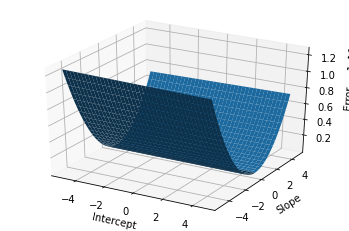

In [31]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis


w0 = np.arange(-5, 5, 0.25)
w1 = np.arange(-5, 5, 0.25)
W0, W1 = np.meshgrid(w0, w1)
E = error(W0,W1)

# используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(W0, W1, E)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()


С помощью метода minimize из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра  𝑤0  в диапазоне [-100,100] и  𝑤1  - в диапазоне [-5, 5]. Начальная точка – ( 𝑤0 ,  𝑤1 ) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров  𝑤0  и  𝑤1 . Подпишите оси и график.

In [33]:
def error1(w):
    s=0.
    x=data['Weight']
    y=data['Height']
    for i in range(1,len(data.index)):
        s+=(y[i]-w[0]-w[1]*x[i])**2
    return s

import scipy.optimize as optimize
min = optimize.minimize(error1, np.array([0,0]), method = 'L-BFGS-B', bounds=((-100,100),(-5, 5)))

min.x, min.fun

(array([57.57160741,  0.08200748]), 67544.15205415593)

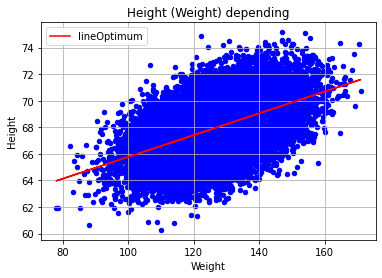

In [34]:
x=np.array(data['Weight'])

w0,w1=min.x
y = [w0+t*w1 for t in x]

data.plot(y='Height',x='Weight', kind='scatter',
color='blue', title='Height (Weight) depending')

plt.plot(x, y, color="red", label="lineOptimum")

plt.grid(True)
plt.legend(loc='upper left')